In [44]:
import pandas as pd
df = pd.read_csv("data/Segmentacion.csv", sep=";")

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27506 entries, 0 to 27505
Data columns (total 15 columns):
nCuentasConDeuda    27506 non-null int64
idCliente           27506 non-null int64
nroCuentas          27506 non-null int64
Min Fecha           27506 non-null object
Max Fecha           27506 non-null object
Transacciones       27506 non-null int64
sumaMontos          27506 non-null float64
Frecuencia          27506 non-null object
Recencia            27506 non-null int64
Atrasos             27506 non-null object
LEALTAD             27506 non-null object
%TRX                27506 non-null float64
%TRX ACUM           27506 non-null float64
INTENSIDAD          27506 non-null object
SEG_VALOR           27506 non-null object
dtypes: float64(3), int64(5), object(7)
memory usage: 3.1+ MB


In [46]:
pd.value_counts(df.SEG_VALOR)

4.SPOT       25362
3.REGULAR      934
2.SILVER       711
1.GOLD         499
Name: SEG_VALOR, dtype: int64

__Excluyendo a los Clientes Spot__

In [47]:
dfDescriptiva = df[df['SEG_VALOR']!="4.SPOT"]
pd.value_counts(dfDescriptiva.SEG_VALOR)

3.REGULAR    934
2.SILVER     711
1.GOLD       499
Name: SEG_VALOR, dtype: int64

In [49]:
montoSV = dfDescriptiva[['sumaMontos', 'SEG_VALOR']].groupby(['SEG_VALOR'])['sumaMontos'].sum()
tranxSV = dfDescriptiva[['Transacciones', 'SEG_VALOR']].groupby(['SEG_VALOR'])['Transacciones'].sum()
clientSV = dfDescriptiva[['idCliente', 'SEG_VALOR']].groupby(['SEG_VALOR'])['idCliente'].count()
display(montoSV/montoSV.sum())
display(tranxSV/tranxSV.sum())
display(clientSV/clientSV.sum())

SEG_VALOR
1.GOLD       0.336276
2.SILVER     0.275690
3.REGULAR    0.388034
Name: sumaMontos, dtype: float64

SEG_VALOR
1.GOLD       0.287778
2.SILVER     0.299817
3.REGULAR    0.412405
Name: Transacciones, dtype: float64

SEG_VALOR
1.GOLD       0.232743
2.SILVER     0.331623
3.REGULAR    0.435634
Name: idCliente, dtype: float64

In [32]:
montoByCat/montoByCat.sum()
montoByCat

SEG_VALOR
1.GOLD         3291150.5
2.SILVER      12893295.5
3.REGULAR     28348930.0
4.SPOT       320107283.2
Name: sumaMontos, dtype: float64

INTENSIDAD,1.HEAVY,2.NORMAL,3.LIGHT
LEALTAD,,,
1.LEAL,85,132,189
2.EN FUGA,127,237,333
3.FUGADO,247,383,411


<IPython.core.display.Javascript object>


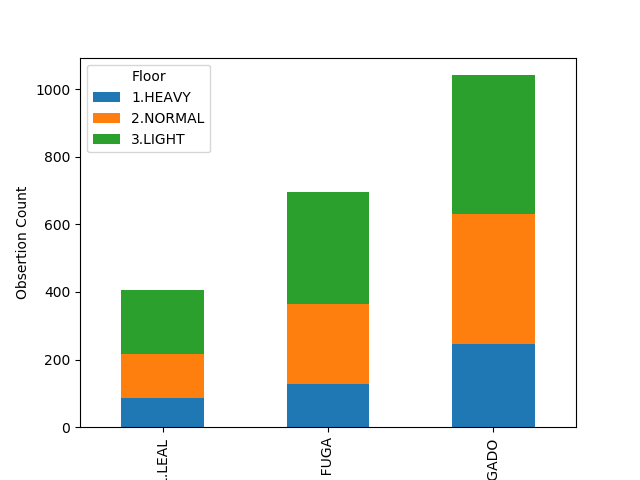

In [29]:
import matplotlib.pyplot as plt
#%pylab notebook
%matplotlib notebook
dfSV = pd.crosstab(df.LEALTAD[df.LEALTAD!="4.SPOT"], df.INTENSIDAD)
display(dfSV)
ax = dfSV.plot.bar(stacked=True)
ax.set_xlabel("Building", rotation=45)
ax.set_ylabel("Obsertion Count")
#ax.set_ylim(0, 5000)
plt.legend(title='Floor')
plt.show()